In [1]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\companySetting")
df

,company,reviews,sentiment
0,IBM,great company fantasy trade program great company,1
1,IBM,good pay learn lot review,1
2,IBM,disclaim lot write course depend work area man...,1
3,IBM,culture general thought ethics open driven col...,1
4,IBM,manage constant belittl employe cause damage m...,0
...,...,...,...
22815,Dell Technologies,flexible work schedule good pay lot inter adva...,1
22816,Dell Technologies,well know far move duc merit qualify post stil...,0
22817,Dell Technologies,fun young good pay great train great place sta...,1
22818,Dell Technologies,great benefit great people great company work ...,1


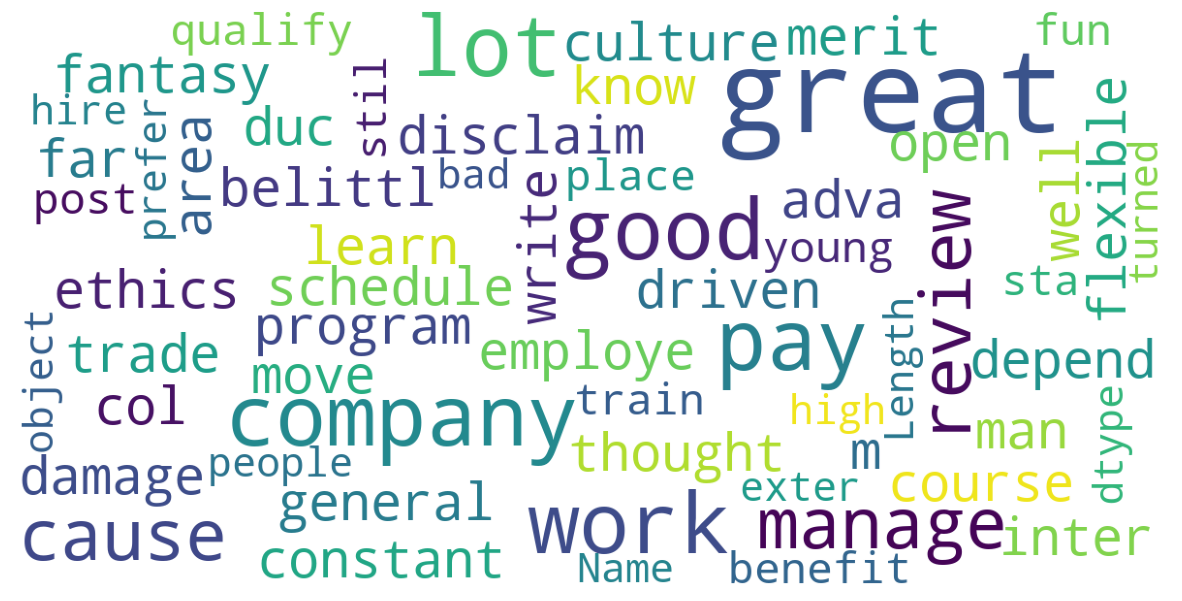

In [4]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)


mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=0.1 



def show_wordcloud(dataset, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(dataset))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df["reviews"])

to see negative words

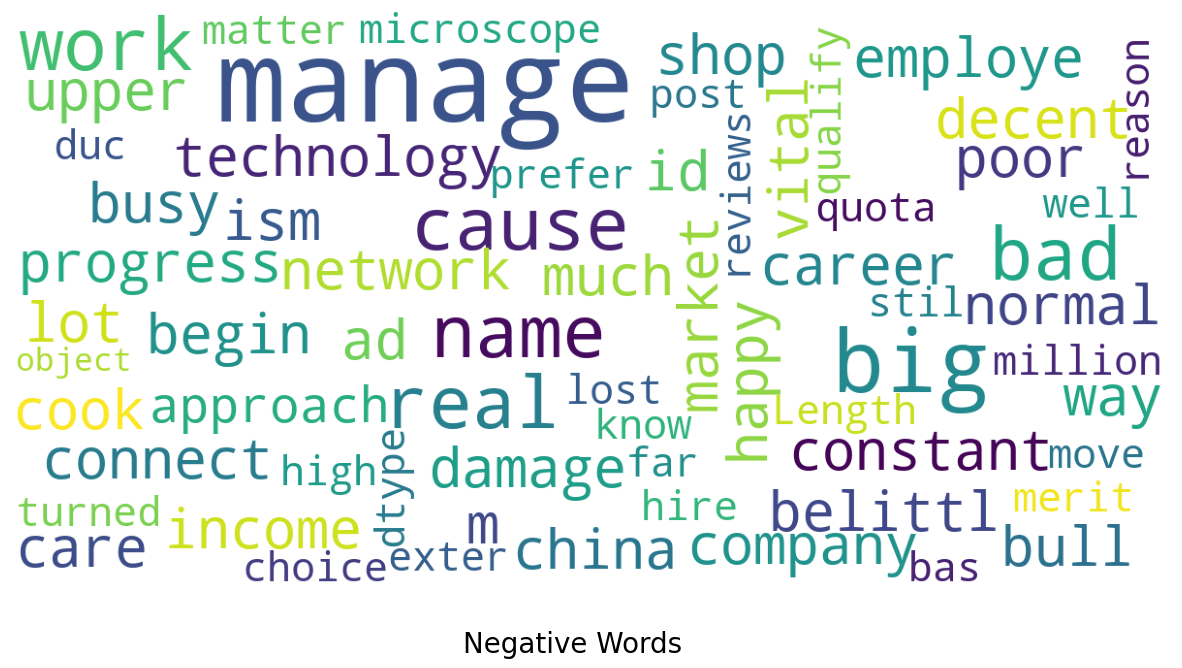

In [5]:
show_wordcloud(df["reviews"][df["sentiment"] == 0] , title="Negative Words")

to see positive words

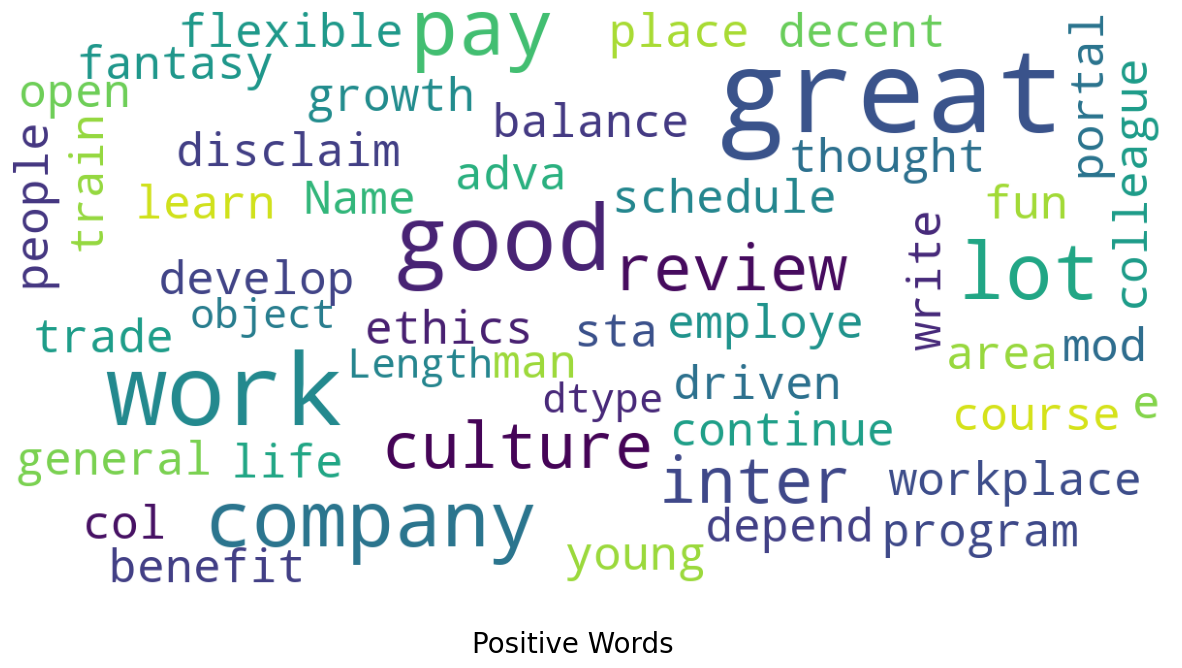

In [33]:
show_wordcloud(df["reviews"][df["sentiment"] == 1] , title="Positive Words")

we can group companies and look at each individually

In [6]:
gk = df.groupby('company')
gk

let's look at the Apple

In [13]:
gk1 = gk.get_group((list(gk.groups)[3]))
gk1

,company,reviews,sentiment
19793,Apple,lot potent growth good company,1
19794,Apple,stress mental health decline unrealist state b...,0
19795,Apple,manage expect way much employe worst job exper...,0
19796,Apple,pay tail career develop good company,1
19797,Apple,work east custom service nice,1
...,...,...,...
21318,Apple,pay benefit great great benefit,1
21319,Apple,man pro can count good,1
21320,Apple,fluctuates retail schedule away work weekend h...,0
21321,Apple,great company culture really care employe grow...,1


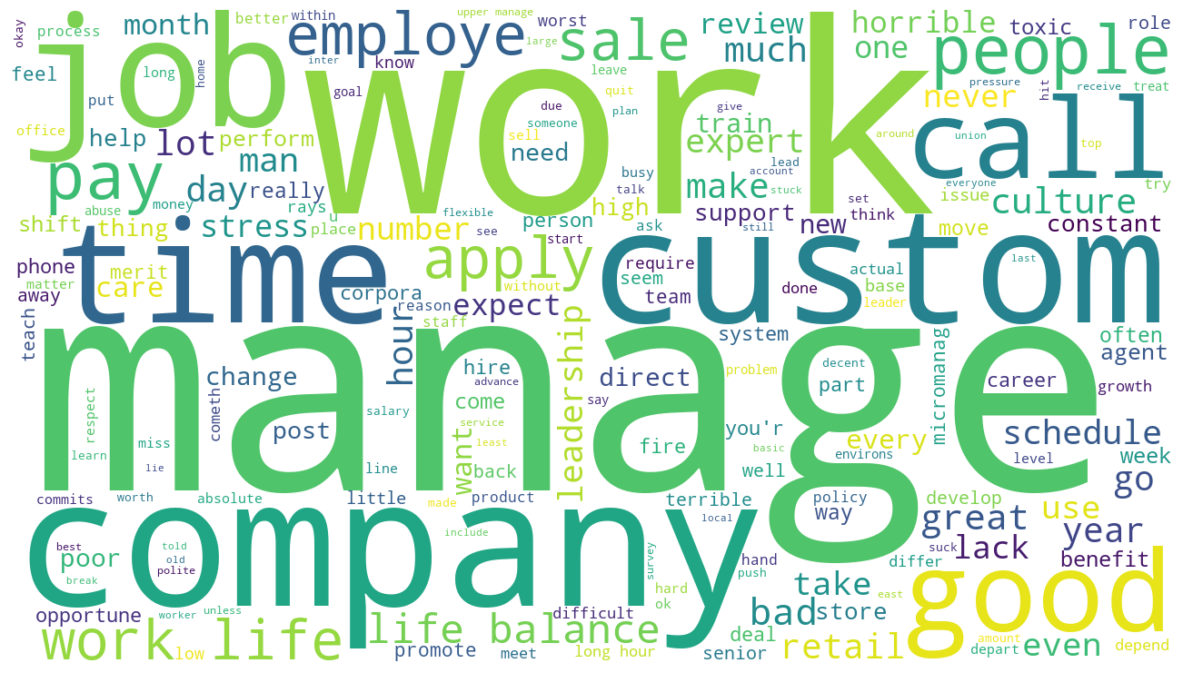

In [10]:

words = " ".join(gk1["reviews"][gk1["sentiment"] == 0])
wordcloud = WordCloud(max_words=200, width =1280, height = 720, background_color="white").generate(words)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

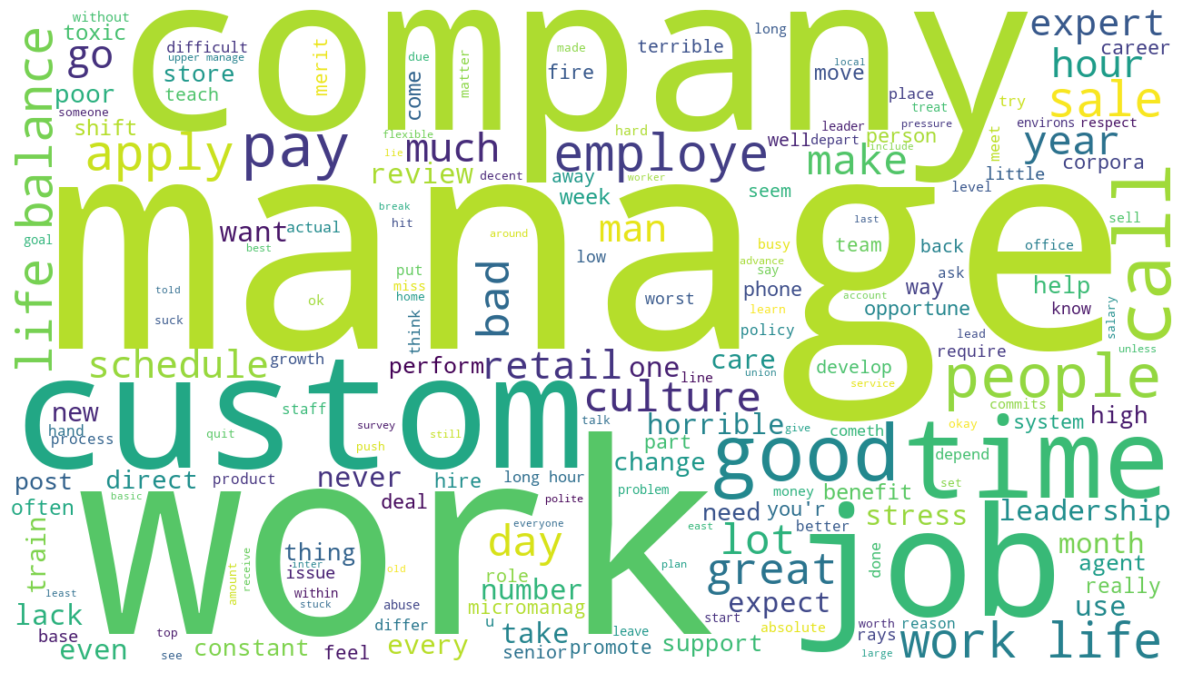

In [11]:
gk1 = gk.get_group((list(gk.groups)[3]))
words = " ".join(gk1["reviews"][gk1["sentiment"] == 0])
wordcloud = WordCloud(max_words=200, width =1280, height = 720, background_color="white").generate(words)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


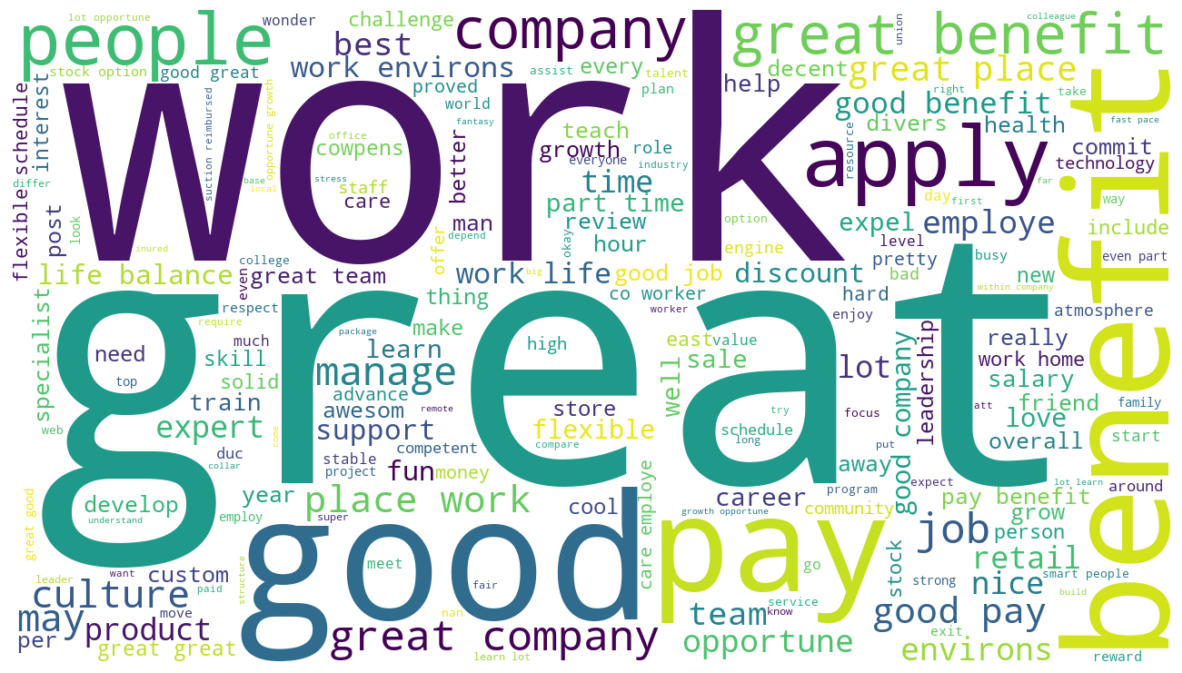

In [12]:
gk1 = gk.get_group((list(gk.groups)[3]))
words = " ".join(gk1["reviews"][gk1["sentiment"] == 1])
wordcloud = WordCloud(max_words=200, width =1280, height = 720, background_color="white").generate(words)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Now let's see which positive and negative words are used the most as bigram.

In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kezer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [17]:
from collections import defaultdict
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)

#get the count of every word in dataframes where sentiment="positive"
for text in df[df.sentiment==1].reviews:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

In [19]:
#get the count of every word in  dataframes where sentiment="negative"
for text in df[df.sentiment==0].reviews:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

In [20]:
#focus on more frequently occuring words for every sentiment=>
df_positive=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))

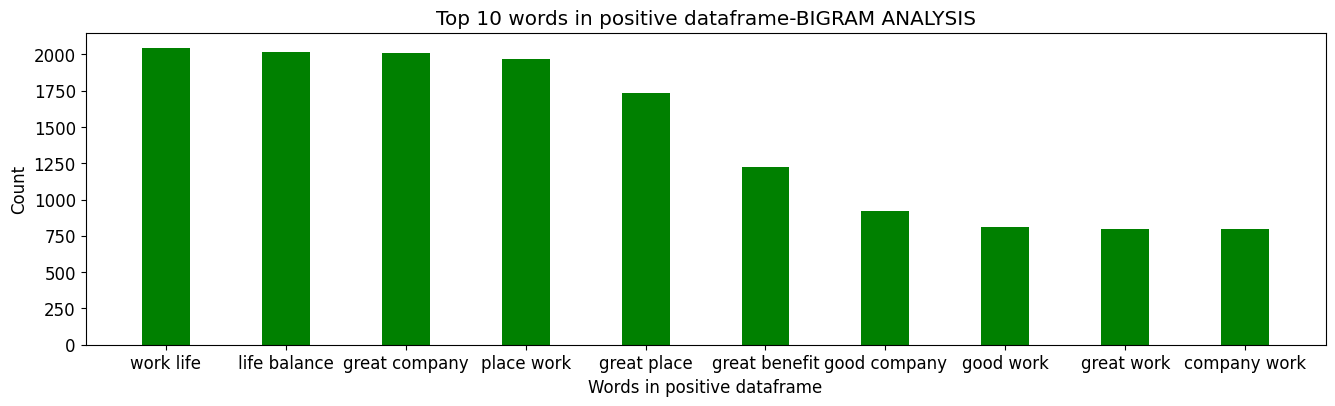

In [22]:

pd1bi=df_positive[0][:10]
pd2bi=df_positive[1][:10]
 

ned1bi=df_negative[0][:10]
ned2bi=df_negative[1][:10]

 

plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")

plt.show()


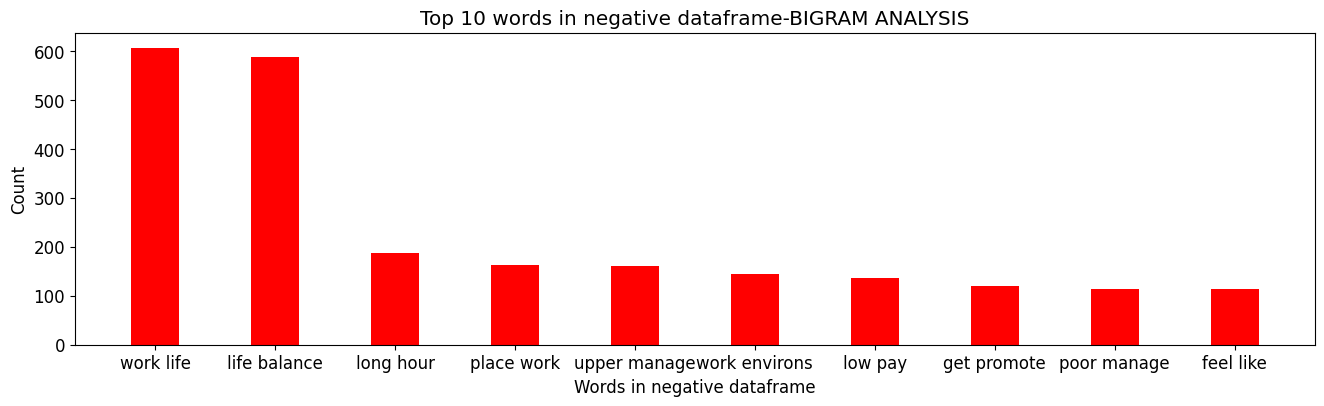

In [23]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")

plt.show()
